автор: Лейман М.А.  

дата создания: 23.03.2025 

# Градиентный бустинг

In [3]:
import warnings
warnings.filterwarnings("ignore")
import time
from glob import glob
import os 
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder




print('Виртуальное окружение')
!which python 
# Текущее положение
print('\nТекущее положение: ')
path_1 = os.getcwd()
print(path_1)

Виртуальное окружение
/home/maksim/anaconda3/envs/rapids-25.02/bin/python

Текущее положение: 
/home/maksim/develops/python/MAKSIM/ML/13_gradient_1


## 1 Классификация

### 1) Загрузка


#### Описание набора данных:  

age     -  возраст: разница в 5 лет  
height(cm)   -      рост(см)  
weight(kg)  -   вес(кг)  
waist(cm)   -   талия(см) окружность талии длина  
eyesight(left)  -   зрение(слева)  
eyesight(right) -   зрение(справа)  
hearing(left)   -   слух(слева)  
hearing(right)  -   слух(справа)  
systolic    -   систолическое: артериальное давление  
relaxation  -   расслабление: артериальное давление 
fasting blood sugar -   уровень сахара в крови натощак  
Cholesterol     -   холестерин: общие  
triglyceride    -   триглицериды  
HDL     -   ЛПВП: тип холестерина  
LDL     -   ЛПНП: тип холестерина  
hemoglobin  -   гемоглобин  
Urine protein   -   белок  мочи  
serum creatinine    -   сывороточный креатинин  
AST -   АСТ: тип глутаминовой щавелевоуксусной трансаминазы  
ALT -   АЛТ: тип глутаминовой щавелевоуксусной трансаминазы  
Gtp -   ГТП: γ-ГТФ  
dental caries   -   кариес зубов  
smoking -   курение  

In [2]:
dataset_path = os.path.join(path_1, "dataset_smoking/train.csv")  # путь к папке с датасетом

train_df = pd.read_csv(dataset_path)


print('\nРазмер данных: ', train_df.shape)

print(train_df.head().to_string(index=False))


Размер данных:  (38984, 23)
 age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  fasting blood sugar  Cholesterol  triglyceride  HDL  LDL  hemoglobin  Urine protein  serum creatinine  AST  ALT  Gtp  dental caries  smoking
  35         170          85       97.0             0.9              0.9              1               1       118          78                   97          239           153   70  142        19.8              1               1.0   61  115  125              1        1
  20         175         110      110.0             0.7              0.9              1               1       119          79                   88          211           128   71  114        15.9              1               1.1   19   25   30              1        0
  45         155          65       86.0             0.9              0.9              1               1       110          80                   80          193        

### 2) Анализ

In [3]:
# EDA: Исследование данных
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  int64  
 1   height(cm)           38984 non-null  int64  
 2   weight(kg)           38984 non-null  int64  
 3   waist(cm)            38984 non-null  float64
 4   eyesight(left)       38984 non-null  float64
 5   eyesight(right)      38984 non-null  float64
 6   hearing(left)        38984 non-null  int64  
 7   hearing(right)       38984 non-null  int64  
 8   systolic             38984 non-null  int64  
 9   relaxation           38984 non-null  int64  
 10  fasting blood sugar  38984 non-null  int64  
 11  Cholesterol          38984 non-null  int64  
 12  triglyceride         38984 non-null  int64  
 13  HDL                  38984 non-null  int64  
 14  LDL                  38984 non-null  int64  
 15  hemoglobin           38984 non-null 

In [4]:
print(train_df.describe())

                age    height(cm)    weight(kg)     waist(cm)  eyesight(left)  \
count  38984.000000  38984.000000  38984.000000  38984.000000    38984.000000   
mean      44.127591    164.689488     65.938718     82.062115        1.014955   
std       12.063564      9.187507     12.896581      9.326798        0.498527   
min       20.000000    130.000000     30.000000     51.000000        0.100000   
25%       40.000000    160.000000     55.000000     76.000000        0.800000   
50%       40.000000    165.000000     65.000000     82.000000        1.000000   
75%       55.000000    170.000000     75.000000     88.000000        1.200000   
max       85.000000    190.000000    135.000000    129.000000        9.900000   

       eyesight(right)  hearing(left)  hearing(right)      systolic  \
count     38984.000000   38984.000000    38984.000000  38984.000000   
mean          1.008768       1.025369        1.026190    121.475631   
std           0.493813       0.157246        0.159703    

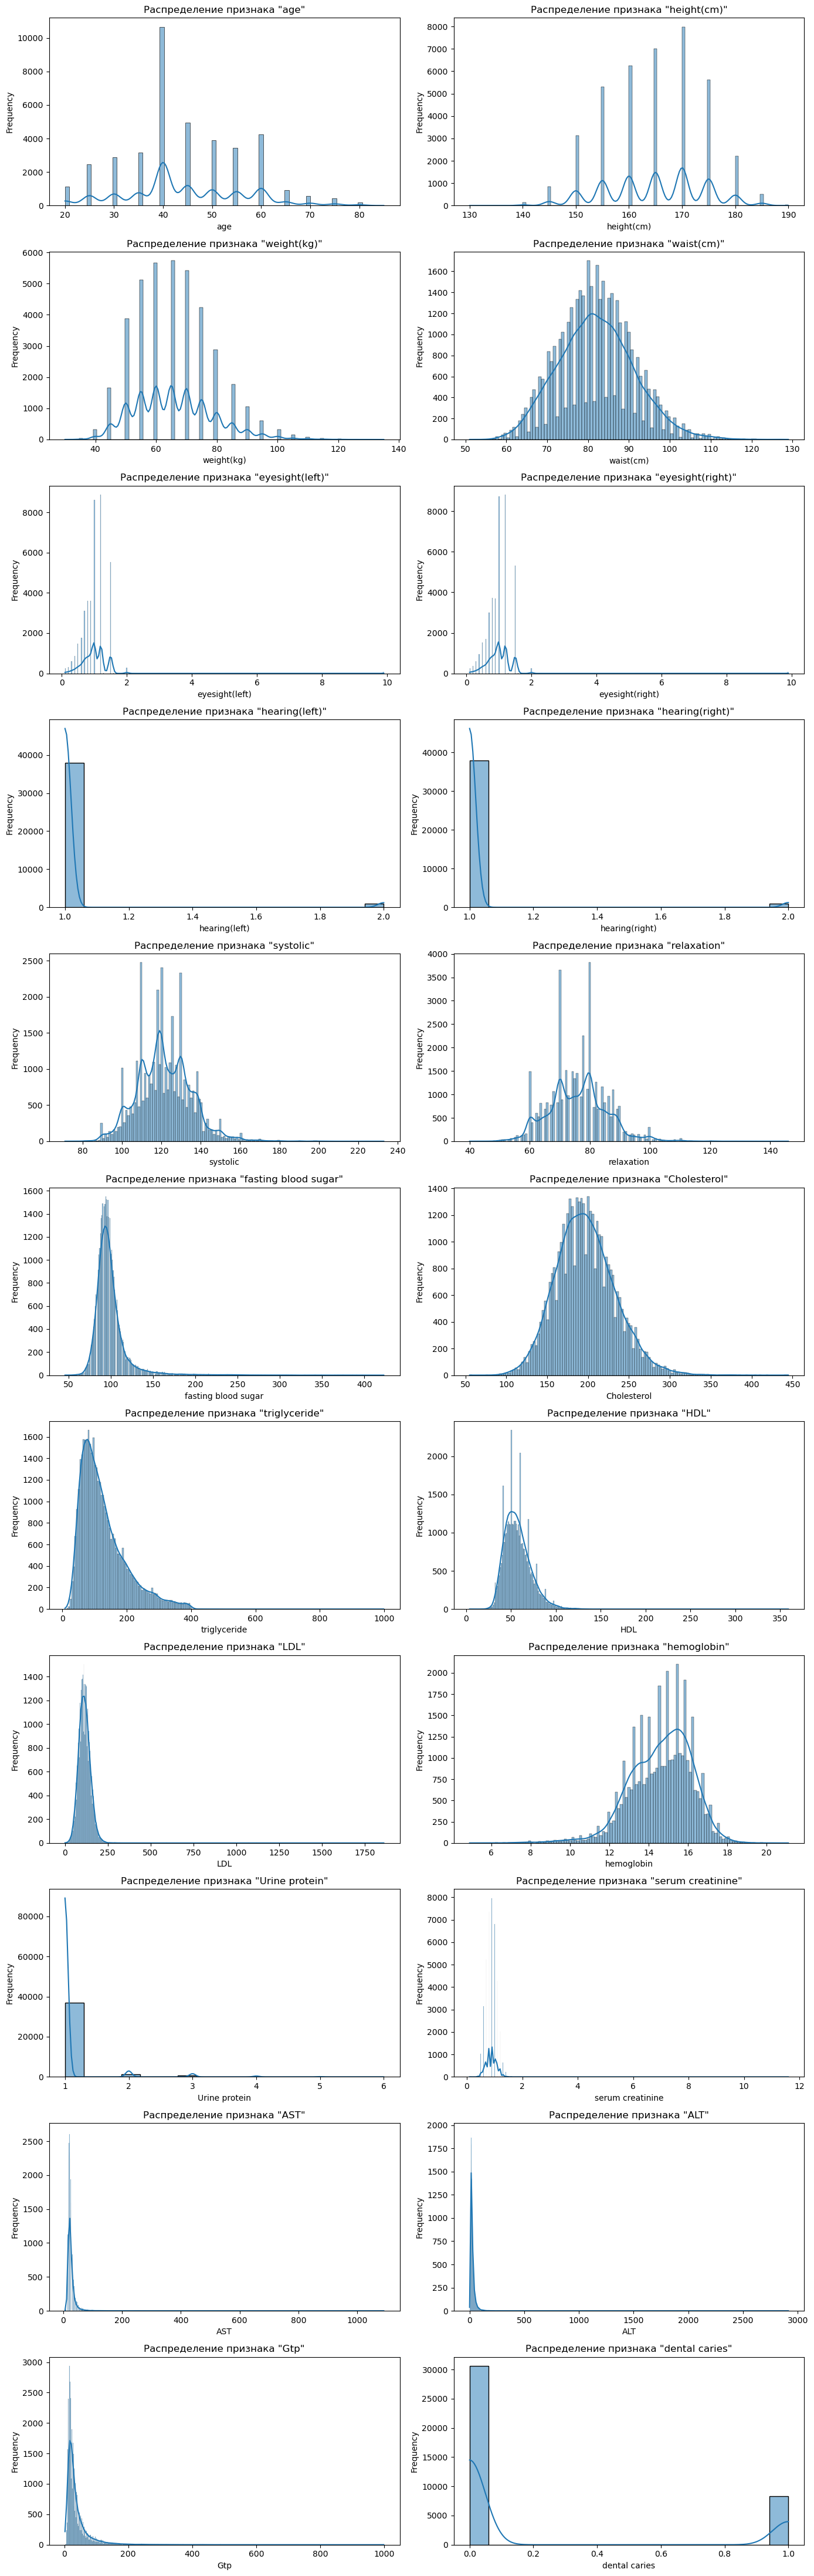

In [5]:
df = train_df.copy()

X = df.drop(columns=["smoking"]) 
y = df["smoking"]  

features = X.columns

num_features = len(features)
num_rows = (num_features + 1) // 2  

fig, axes = plt.subplots(num_rows, 2, figsize=(14, num_rows * 4))
axes = axes.flatten() 

for i, feature in enumerate(features):
    sns.histplot(X[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Распределение признака "{feature}"')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

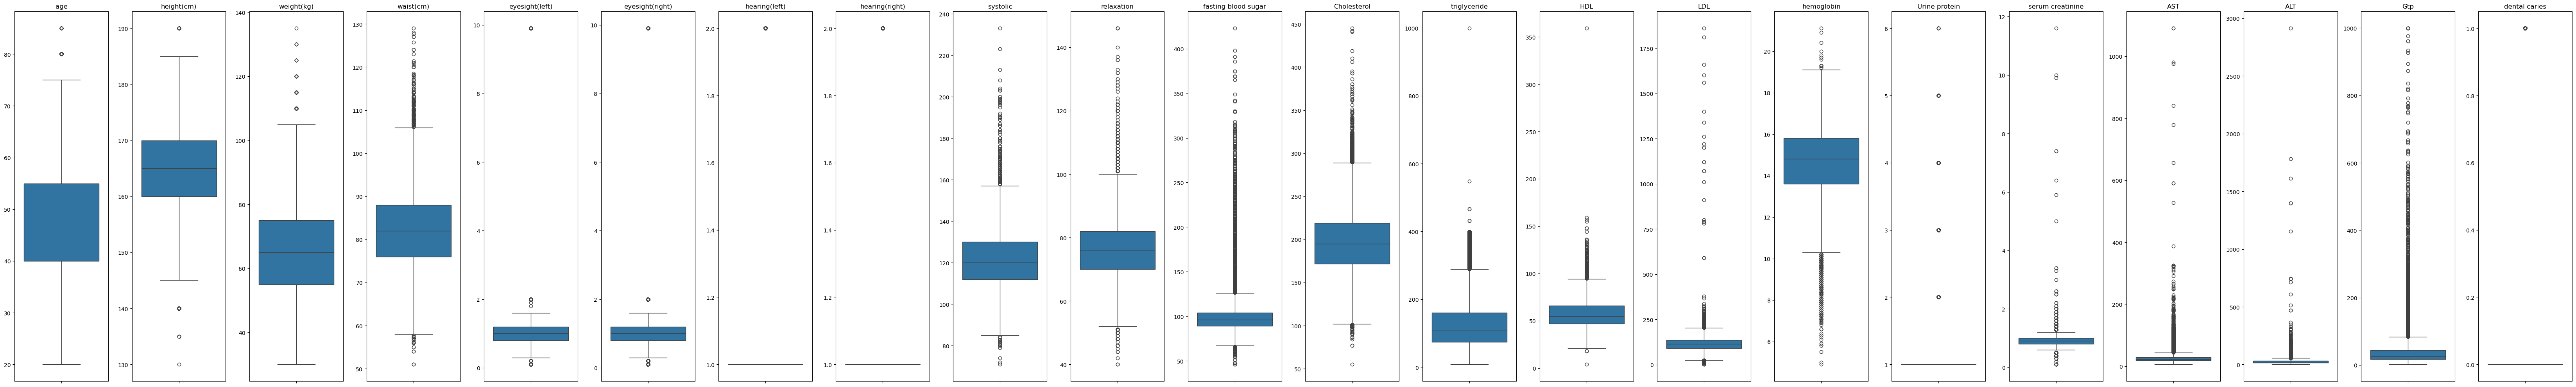

In [6]:

num_features = len(features)

fig, axes = plt.subplots(1, num_features, figsize=(num_features * 3, 10))

for i, feature in enumerate(features):
    sns.boxplot(y=X[feature], ax=axes[i])
    axes[i].set_title(feature)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

### 3) Обучение


=== Таблица с результатами ===
 n_estimators  max_depth  learning_rate  subsample  colsample_bytree  Accuracy  ROC AUC  Training Time (s)
          100          3           0.01        0.8               0.8    0.7199   0.8053               0.16
          100          3           0.01        1.0               0.8    0.7154   0.8048               0.10
          200          3           0.01        0.8               0.8    0.7330   0.8109               0.17
          200          3           0.01        1.0               0.8    0.7336   0.8108               0.16
          100          6           0.01        0.8               0.8    0.7425   0.8269               0.21
          100          6           0.01        1.0               0.8    0.7411   0.8265               0.21
          200          6           0.01        0.8               0.8    0.7540   0.8318               0.38
          200          6           0.01        1.0               0.8    0.7526   0.8310               0.37
     

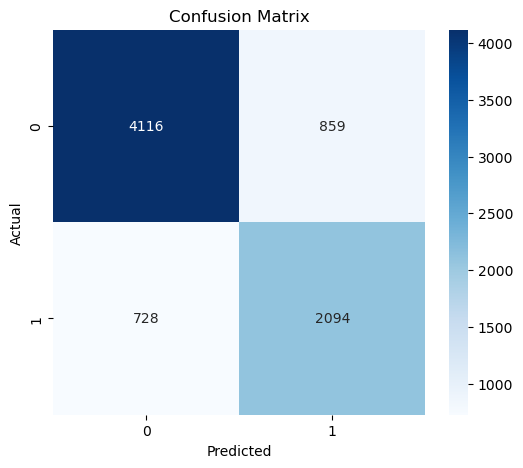

In [10]:
import time
import xgboost as xgb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_curve, confusion_matrix

# Разделяем данные
X = train_df.drop(columns=['smoking'])  # Фичи
y = train_df['smoking']  # Целевая переменная

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Настраиваем XGBoost на GPU
param_grid = {
    'n_estimators': [100, 200],   # Количество деревьев
    'max_depth': [3, 6, 10],      # Глубина деревьев
    'learning_rate': [0.01, 0.1], # Скорость обучения
    'subsample': [0.8, 1],        # Доля выборки для одного дерева
    'colsample_bytree': [0.8, 1], # Доля признаков для одного дерева
    'tree_method': ['gpu_hist'],  # Используем GPU
}

results = []
best_model = None
best_acc = 0
best_params = None

# Подбираем параметры
for params in ParameterGrid(param_grid):
    start_time = time.time()

    model = xgb.XGBClassifier(**params, use_label_encoder=False, eval_metric='logloss')
    model.fit(X_train, y_train)

    end_time = time.time()
    training_time = end_time - start_time

    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Добавляем результаты в таблицу
    results.append({
        "n_estimators": params['n_estimators'],
        "max_depth": params['max_depth'],
        "learning_rate": params['learning_rate'],
        "subsample": params['subsample'],
        "colsample_bytree": params['colsample_bytree'],
        "Accuracy": round(acc, 4),
        "ROC AUC": round(roc_auc, 4),
        "Training Time (s)": round(training_time, 2)
    })

    if acc > best_acc:
        best_acc = acc
        best_model = model
        best_params = params

# Вывод таблицы с результатами
results_df = pd.DataFrame(results)
print("\n=== Таблица с результатами ===")
print(results_df.to_string(index=False, line_width=500))

#  Выводим лучшие параметры
print(f"\nЛучшие параметры: {best_params}")
print(f"Лучшая Accuracy: {best_acc:.4f}")

# Итоговая оценка лучшей модели
y_pred_best = best_model.predict(X_test)
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]

acc_best = accuracy_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_proba_best)

prec, rec, _ = precision_recall_curve(y_test, y_pred_proba_best)

print("\n=== Итоговые метрики лучшей модели ===")
print(f"Accuracy: {acc_best:.4f}")
print(f"ROC AUC: {roc_auc_best:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Регрессия

Признаки (столбцы):  
Возраст - __Age__ : Возраст застрахованного лица (числовой)  
Пол - __Gender__ : Пол застрахованного лица (Категория: Мужской, Женский)  
Годовой доход - __Annual Income__ : Годовой доход застрахованного лица (числовой, асимметричный)  
Семейное положение - __Marital Status__ : Семейное положение застрахованного лица (категория: холост, женат, разведен)  
Количество иждивенцев - __Number of Dependents__ : Количество иждивенцев (числовое, с пропущенными значениями)  
Уровень образования - __Education Level__ : наивысший достигнутый уровень образования (категория: средняя школа, бакалавр, магистр, доктор философии)  
Род занятий - __Occupation__ : Род занятий застрахованного лица (категория: работающий по найму, самозанятый, безработный)  
Оценка состояния здоровья - __Health Score__ : оценка, отражающая состояние здоровья (числовая, асимметричная)  
Местоположение - __Location__ : Тип местоположения (Категория: Город, Пригород, Сельская местность)  
Тип полиса - __Policy Type__ : Тип страхового полиса (Категорийный: Базовый, Комплексный, Премиум)  
Предыдущие заявления - __Previous Claims__ : Количество предыдущих заявлений (числовое, с выбросами)  
Возраст транспортного средства - __Vehicle Age__ : Возраст застрахованного транспортного средства (числовой)  
Кредитный рейтинг - __Credit Score__ : кредитный рейтинг застрахованного лица (числовой, с отсутствующими значениями)  
Срок действия страхового полиса - __Insurance Duration__ : Срок действия страхового полиса (числовой, в годах)  
Дата начала действия полиса - __Policy Start Date__ : Дата начала действия страхового полиса (Текст, неправильно отформатирован)  
Отзывы клиентов - __Customer Feedback__ : краткие отзывы клиентов (текст)  
Статус курения  - __Smoking Status__  : Статус курения застрахованного лица (Категория: Да, Нет)  
Частота упражнений - __Exercise Frequency__ : Частота упражнений (Категория: Ежедневно, Еженедельно, Ежемесячно, Редко)  
Тип недвижимости  - __Property Type__ : Тип собственности (Категория: Дом, Квартира, Кондоминиум)  

Целевая переменная:  
Сумма страховой премии - __Premium Amount__ : целевая переменная, представляющая сумму страховой премии (числовая, асимметричная) 

In [4]:
def handle_missing_values(data, threshold=35):
    """
    Обрабатывает пропущенные значения:
    - Удаляет столбцы, если пропусков > threshold%
    - 'Number of Dependents' → 0
    - 'Credit Score' → среднее значение
    - 'Property Type' → 'Apartment' (самая частая категория)
    - 'Property Type' → Кодируем: Apartment=0, Condo=1, House=2
    - Остальные числовые столбцы → медиана
    - Категориальные столбцы → мода
    """

    # Создаём копию, чтобы не менять оригинальные данные
    data = data.copy()

    # 1. Считаем процент пропусков в каждом столбце
    missing_percent = data.isnull().mean() * 100

    # 2. Удаляем столбцы, если пропусков > threshold%
    cols_to_drop = list(missing_percent[missing_percent > threshold].index)
    data.drop(columns=cols_to_drop, inplace=True)
    print(f"Удалены столбцы с более чем {threshold}% пропусков: {cols_to_drop}\n")

    # 3. Заполняем пропуски в "Number of Dependents" значением 0
    if "Number of Dependents" in data.columns:
        data["Number of Dependents"] = data["Number of Dependents"].fillna(0)
        print("Пропуски в 'Number of Dependents' заменены на 0.\n")

    # 4. Заполняем пропуски в "Credit Score" средним значением
    if "Credit Score" in data.columns:
        mean_credit_score = data["Credit Score"].mean()
        data["Credit Score"] = data["Credit Score"].fillna(mean_credit_score)
        print(f"Пропуски в 'Credit Score' заменены на среднее: {mean_credit_score:.2f}\n")

    # 5. Заполняем пропуски в "Property Type"
    if "Property Type" in data.columns:
        data["Property Type"] = data["Property Type"].fillna("House")
        print("Пропуски в 'Property Type' заменены на 'House'.\n")

        # Кодируем 'Property Type' в порядке возрастания
        property_mapping = {"Apartment": 0, "Condo": 1, "House": 2}
        data["Property Type"] = data["Property Type"].map(property_mapping)
        print("Столбец 'Property Type' закодирован: Apartment=0, Condo=1, House=2.\n")

    # 6. Заполняем оставшиеся числовые столбцы медианой
    numeric_columns = data.select_dtypes(include=[np.number]).drop(
        columns=["Number of Dependents", "Credit Score"], errors="ignore"
    )
    data[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.median())

    # 7. Заполняем остальные категориальные столбцы модой
    categorical_columns = data.select_dtypes(exclude=[np.number])
    for col in categorical_columns.columns:
        data[col] = data[col].fillna(data[col].mode().iloc[0])

    return data




def encode_categorical_features(data):
    """
    Кодирует категориальные признаки:
    - Label Encoding для порядковых категорий (Education Level, Exercise Frequency, Policy Type, Location, Occupation)
    - One-Hot Encoding для номинальных категорий (Gender, Marital Status, Smoking Status)
    """

    # 1. Определяем категории
    ordinal_features = ["Education Level", "Exercise Frequency", "Policy Type", "Location", "Occupation"]  # Порядковые категории
    nominal_features = ["Gender", "Marital Status", "Smoking Status"]  # Номинальные категории

    # 2. Кодируем 'Policy Type' вручную
    policy_mapping = {"Basic": 0, "Comprehensive": 1, "Premium": 2}
    if "Policy Type" in data.columns:
        data["Policy Type"] = data["Policy Type"].map(policy_mapping)
        print("Столбец 'Policy Type' закодирован как:", policy_mapping)

    # 3. Кодируем 'Location' вручную
    location_mapping = {"Rural": 0, "Suburban": 1, "Urban": 2}
    if "Location" in data.columns:
        data["Location"] = data["Location"].map(location_mapping)
        print("Столбец 'Location' закодирован как:", location_mapping)

    # 4. Кодируем 'Occupation' вручную
    occupation_mapping = {"Unemployed": 0, "Self-Employed": 1, "Employed": 2}
    if "Occupation" in data.columns:
        data["Occupation"] = data["Occupation"].map(occupation_mapping)
        print("Столбец 'Occupation' закодирован как:", occupation_mapping)

    # 5. Label Encoding для остальных порядковых переменных
    label_encoders = {}
    for col in ordinal_features:
        if col in data.columns and col not in ["Policy Type", "Location", "Occupation"]:  # Эти уже закодированы вручную
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col])
            label_encoders[col] = le  # Сохраняем энкодер (для обратного преобразования)

    # 6. One-Hot Encoding для номинальных переменных
    data = pd.get_dummies(data, columns=nominal_features, drop_first=True)  # drop_first=True уменьшает размерность

    return data, label_encoders

### 1) Загрузка

In [5]:
train_df = pd.read_csv('dataset/train.csv')


train_df = train_df.drop(columns=["id"])


print('\nРазмер данных: ', train_df.shape)

print(train_df.head().to_string(index=False))

X = train_df.drop(columns=['Premium Amount'])
y = train_df['Premium Amount']
print("\nПропуски:")
train_df.isnull().sum()


Размер данных:  (1200000, 20)
 Age Gender  Annual Income Marital Status  Number of Dependents Education Level    Occupation  Health Score Location   Policy Type  Previous Claims  Vehicle Age  Credit Score  Insurance Duration          Policy Start Date Customer Feedback Smoking Status Exercise Frequency Property Type  Premium Amount
19.0 Female        10049.0        Married                   1.0      Bachelor's Self-Employed     22.598761    Urban       Premium              2.0         17.0         372.0                 5.0 2023-12-23 15:21:39.134960              Poor             No             Weekly         House          2869.0
39.0 Female        31678.0       Divorced                   3.0        Master's           NaN     15.569731    Rural Comprehensive              1.0         12.0         694.0                 2.0 2023-06-12 15:21:39.111551           Average            Yes            Monthly         House          1483.0
23.0   Male        25602.0       Divorced                

Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64

### 2) Анализ

In [6]:
# Оставляем только числовые столбцы
numeric_data = train_df.select_dtypes(include=[np.number])

# Вычисляем статистики
statistics = {
    "Доля пропусков": train_df.isnull().mean(),
    "Максимум": numeric_data.max(),
    "Минимум": numeric_data.min(),
    "Среднее": numeric_data.mean(),
    "Медиана": numeric_data.median(),
    "Дисперсия": numeric_data.var(),
    "Квантиль 0.1": numeric_data.quantile(0.1),
    "Квантиль 0.9": numeric_data.quantile(0.9),
    "Квартиль 1": numeric_data.quantile(0.25),
    "Квартиль 3": numeric_data.quantile(0.75),
}

statistics_df = pd.DataFrame(statistics)
print(statistics_df.to_string())

                      Доля пропусков       Максимум     Минимум       Среднее       Медиана     Дисперсия  Квантиль 0.1  Квантиль 0.9   Квартиль 1    Квартиль 3
Age                     1.558750e-02      64.000000   18.000000     41.145563     41.000000  1.833302e+02     22.000000     60.000000    30.000000     53.000000
Annual Income           3.745750e-02  149997.000000    1.000000  32745.217777  23911.000000  1.035521e+09   2627.000000  81075.000000  8001.000000  44634.000000
Credit Score            1.149017e-01     849.000000  300.000000    592.924350    595.000000  2.249458e+04    383.000000    792.000000   468.000000    721.000000
Customer Feedback       6.485333e-02            NaN         NaN           NaN           NaN           NaN           NaN           NaN          NaN           NaN
Education Level         0.000000e+00            NaN         NaN           NaN           NaN           NaN           NaN           NaN          NaN           NaN
Exercise Frequency      0.000000e+

In [7]:
# Очистка от пропусков 
train_data_cleaned = handle_missing_values(train_df)
num_col_del = ['id']

Удалены столбцы с более чем 35% пропусков: []

Пропуски в 'Number of Dependents' заменены на 0.

Пропуски в 'Credit Score' заменены на среднее: 592.92

Пропуски в 'Property Type' заменены на 'House'.

Столбец 'Property Type' закодирован: Apartment=0, Condo=1, House=2.



In [8]:
# Закодируем категориальные столбцы
train_data_encoded, label_encoders = encode_categorical_features(train_data_cleaned)

print(train_data_encoded.head().to_string())

Столбец 'Policy Type' закодирован как: {'Basic': 0, 'Comprehensive': 1, 'Premium': 2}
Столбец 'Location' закодирован как: {'Rural': 0, 'Suburban': 1, 'Urban': 2}
Столбец 'Occupation' закодирован как: {'Unemployed': 0, 'Self-Employed': 1, 'Employed': 2}
    Age  Annual Income  Number of Dependents  Education Level  Occupation  Health Score  Location  Policy Type  Previous Claims  Vehicle Age  Credit Score  Insurance Duration           Policy Start Date Customer Feedback  Exercise Frequency  Property Type  Premium Amount  Gender_Male  Marital Status_Married  Marital Status_Single  Smoking Status_Yes
0  19.0        10049.0                   1.0                0           1     22.598761         2            2              2.0         17.0     372.00000                 5.0  2023-12-23 15:21:39.134960              Poor                   3              2          2869.0        False                    True                  False               False
1  39.0        31678.0                   3.

In [9]:
train_data_encoded["Policy Start Date"] = pd.to_datetime(train_data_encoded["Policy Start Date"])

# Извлекаем только год
train_data_encoded["Policy Start Date"] = train_data_encoded["Policy Start Date"].dt.year  

# Сортируем список уникальных годов
unique_years = sorted(train_data_encoded["Policy Start Date"].unique())

# Создаём словарь для кодирования годов
year_mapping = {year: idx for idx, year in enumerate(unique_years)}

# Применяем замену
train_data_encoded["Policy Start Date"] = train_data_encoded["Policy Start Date"].map(year_mapping)

# Проверяем результат
print(train_data_encoded[["Policy Start Date"]].head())
print(f"Годы закодированы следующим образом: {year_mapping}")

# Определяем правильный порядок для категорий
feedback_mapping = {
    "Average": 1,
    "Good": 2,
    "Poor": 0
}

# Применяем mapping
train_data_encoded["Customer Feedback"] = train_data_encoded["Customer Feedback"].map(feedback_mapping)

# Проверяем результат
print(train_data_encoded["Customer Feedback"].head())

   Policy Start Date
0                  4
1                  4
2                  4
3                  5
4                  2
Годы закодированы следующим образом: {np.int32(2019): 0, np.int32(2020): 1, np.int32(2021): 2, np.int32(2022): 3, np.int32(2023): 4, np.int32(2024): 5}
0    0
1    1
2    2
3    0
4    0
Name: Customer Feedback, dtype: int64


### Обучение

In [ ]:
import xgboost as xgb
import cudf
import cupy
from cuml.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = train_data_encoded.drop(columns=['Premium Amount'])
y = train_data_encoded['Premium Amount']


X = cudf.DataFrame(X)
y = cudf.Series(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_cp = X_train.to_cupy()
X_test_cp = X_test.to_cupy()
y_train_cp = y_train.to_cupy()
y_test_cp = y_test.to_cupy()

# Обучение модели XGBoost на GPU
model = xgb.XGBRegressor(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method="hist", 
    device="cuda"
)

# Обучение модели
model.fit(X_train_cp, y_train_cp)

# Предсказание
y_pred = model.predict(X_test_cp)

# **Метрики качества**
mae = mean_absolute_error(y_test_cp.get(), y_pred)
rmse = mean_squared_error(y_test_cp.get(), y_pred)
r2 = r2_score(y_test_cp.get(), y_pred)

# Вывод метрик
print("\n=== Итоговые метрики ===")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2: {r2:.4f}")



=== Итоговые метрики ===
MAE: 641.0915
RMSE: 709367.7916
R^2: 0.0477


In [45]:
import xgboost as xgb
import cudf
import cupy
import time
from cuml.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = train_data_encoded.drop(columns=['Premium Amount'])
y = train_data_encoded['Premium Amount']

X = cudf.DataFrame(X)
y = cudf.Series(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train_cp = X_train.to_cupy()
X_test_cp = X_test.to_cupy()
y_train_cp = y_train.to_cupy()
y_test_cp = y_test.to_cupy()


param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [4, 6, 8],
    "learning_rate": [0.05, 0.1, 0.2],
    "subsample": [0.7, 0.8, 0.9],
    "colsample_bytree": [0.7, 0.8, 0.9]
}


model = xgb.XGBRegressor(tree_method="hist", device="cuda")


start_time = time.time()

# Подбор параметров (GridSearch)
grid_search = GridSearchCV(model, param_grid, cv=3, scoring="r2", verbose=1)
grid_search.fit(X_train_cp, y_train_cp)

end_time = time.time()
search_time = end_time - start_time


best_params = grid_search.best_params_
print("\n=== Лучшие параметры ===")
print(best_params)


start_train_time = time.time()
best_model = xgb.XGBRegressor(**best_params, tree_method="hist", device="cuda")
best_model.fit(X_train_cp, y_train_cp)
end_train_time = time.time()
train_time = end_train_time - start_train_time


y_pred = best_model.predict(X_test_cp)


mae = mean_absolute_error(y_test_cp.get(), y_pred)
rmse = mean_squared_error(y_test_cp.get(), y_pred)
r2 = r2_score(y_test_cp.get(), y_pred)

print("\n=== Итоговые метрики ===")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2: {r2:.4f}")

print(f"\n Время подбора параметров: {search_time:.2f} сек")
print(f" Время обучения модели: {train_time:.2f} сек")


Fitting 3 folds for each of 243 candidates, totalling 729 fits

=== Лучшие параметры ===
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.7}

=== Итоговые метрики ===
MAE: 654.1797
RMSE: 723124.3192
R^2: 0.0293

 Время подбора параметров: 774.06 сек
 Время обучения модели: 0.47 сек
